In [10]:
from google.colab import drive
drive.mount('/content/drive')

BASE_DRIVE_PATH = "/content/drive/MyDrive/AgriYield_Data"


Mounted at /content/drive


In [11]:
import os, zipfile, glob

fao_path = "/content/drive/MyDrive/FAOSTAT_data_en_11-28-2025.csv"
crop_zip_path = "/content/drive/MyDrive/crop recommendation.zip"

unzip_dir = "/content/crop_unzipped"
os.makedirs(unzip_dir, exist_ok=True)

with zipfile.ZipFile(crop_zip_path, "r") as z:
    z.extractall(unzip_dir)

csv_files = glob.glob(os.path.join(unzip_dir, "**", "*.csv"), recursive=True)
if not csv_files:
    raise FileNotFoundError("No CSV found inside the ZIP file.")

crop_csv_path = csv_files[0]
print("FAO path:", fao_path)
print("Crop CSV path:", crop_csv_path)


FAO path: /content/drive/MyDrive/FAOSTAT_data_en_11-28-2025.csv
Crop CSV path: /content/crop_unzipped/Crop_recommendation.csv


In [12]:
import pandas as pd

def try_read_csv(path):
    last_exc = None
    for enc in ("utf-8", "latin1", "cp1252"):
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception as e:
            last_exc = e
    raise last_exc

fao = try_read_csv(fao_path)
crop = try_read_csv(crop_csv_path)

print("FAO shape:", fao.shape)
print("Crop shape:", crop.shape)
display(fao.head(5))
display(crop.head(5))


FAO shape: (6022, 15)
Crop shape: (2200, 8)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,159,China,5312,Area harvested,1371.0,"Almonds, in shell",2015,2015,ha,13493.0,E,Estimated value,NaN
1,QCL,Crops and livestock products,159,China,5412,Yield,1371.0,"Almonds, in shell",2015,2015,kg/ha,3192.7,E,Estimated value,NaN
2,QCL,Crops and livestock products,159,China,5312,Area harvested,1371.0,"Almonds, in shell",2016,2016,ha,13194.0,E,Estimated value,NaN
3,QCL,Crops and livestock products,159,China,5412,Yield,1371.0,"Almonds, in shell",2016,2016,kg/ha,3279.7,E,Estimated value,NaN
4,QCL,Crops and livestock products,159,China,5312,Area harvested,1371.0,"Almonds, in shell",2017,2017,ha,12881.0,E,Estimated value,NaN


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:

if "label" in crop.columns and "Crop" not in crop.columns:
    crop = crop.rename(columns={"label": "Crop"})


if "Crop" not in crop.columns:
    candidates = [c for c in crop.columns if 'crop' in c.lower() or 'label' in c.lower()]
    if candidates:
        crop = crop.rename(columns={candidates[0]: "Crop"})
    else:
        nonnum = crop.select_dtypes(exclude='number').columns.tolist()
        if nonnum:
            crop = crop.rename(columns={nonnum[0]: "Crop"})
        else:
            raise KeyError("Couldn't find a Crop column in crop dataset. Please rename the crop column to 'Crop' or 'label'.")


crop['Crop'] = crop['Crop'].astype(str)
crop['crop_clean'] = crop['Crop'].str.lower().str.strip()
print("Unique crops in crop file:", sorted(set(crop['crop_clean']))[:40])
display(crop.head())


Unique crops in crop file: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


,N,P,K,temperature,humidity,ph,rainfall,Crop,crop_clean
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,rice


In [14]:
if "label" in crop.columns and "Crop" not in crop.columns:
    crop = crop.rename(columns={"label": "Crop"})

if "Crop" not in crop.columns:
    candidates = [c for c in crop.columns if 'crop' in c.lower() or 'label' in c.lower()]
    if candidates:
        crop = crop.rename(columns={candidates[0]: "Crop"})
    else:
        nonnum = crop.select_dtypes(exclude='number').columns.tolist()
        if nonnum:
            crop = crop.rename(columns={nonnum[0]: "Crop"})
        else:
            raise KeyError("Couldn't find a Crop column in crop dataset. Please rename the crop column to 'Crop' or 'label'.")

crop['Crop'] = crop['Crop'].astype(str)
crop['crop_clean'] = crop['Crop'].str.lower().str.strip()

# -------------------------------
# ⭐ CHANGED PART (vertical output)
# -------------------------------
print("Unique crops in crop file (vertical list):")
unique_crops = sorted(set(crop['crop_clean']))
for c in unique_crops:
    print("-", c)

print("\nCrop dataset preview:")
display(crop.head())


Unique crops in crop file (vertical list):
- apple
- banana
- blackgram
- chickpea
- coconut
- coffee
- cotton
- grapes
- jute
- kidneybeans
- lentil
- maize
- mango
- mothbeans
- mungbean
- muskmelon
- orange
- papaya
- pigeonpeas
- pomegranate
- rice
- watermelon

Crop dataset preview:


,N,P,K,temperature,humidity,ph,rainfall,Crop,crop_clean
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,rice


In [15]:
import re


possible_item_cols = [c for c in fao.columns if 'item' in c.lower() and 'code' not in c.lower()]
if not possible_item_cols:

    possible_item_cols = [c for c in fao.columns if 'item' in c.lower()]

if not possible_item_cols:

    nonnum = fao.select_dtypes(exclude='number').columns.tolist()
    if nonnum:
        item_col = nonnum[0]
    else:
        raise KeyError("Couldn't detect an Item column in FAO dataset.")
else:
    item_col = possible_item_cols[0]

print("Using FAO column for crop names:", item_col)

def preprocess_item(x):
    s = str(x).lower()

    s = re.sub(r"\([^)]*\)", " ", s)

    s = s.replace("/", ",")

    s = re.sub(r"[\r\n]+", " ", s)
    s = re.sub(r"\s+", " ", s)
    return s.strip()

fao_proc = fao.copy()
fao_proc['Item_clean_raw'] = fao_proc[item_col].apply(preprocess_item)
fao_proc['Item_list'] = fao_proc['Item_clean_raw'].str.split(',')


fao_exp = fao_proc.explode('Item_list').copy()

fao_exp['crop_clean'] = (
    fao_exp['Item_list'].astype(str)
    .str.replace(r"[^a-zA-Z ]", " ", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

print("Exploded FAO shape (before filtering):", fao_exp.shape)
display(fao_exp[[item_col, 'Item_clean_raw','Item_list','crop_clean']].head(20))


Using FAO column for crop names: Item
Exploded FAO shape (before filtering): (9273, 18)


,Item,Item_clean_raw,Item_list,crop_clean
0,"Almonds, in shell","almonds, in shell",almonds,almonds
0,"Almonds, in shell","almonds, in shell",in shell,in shell
1,"Almonds, in shell","almonds, in shell",almonds,almonds
1,"Almonds, in shell","almonds, in shell",in shell,in shell
2,"Almonds, in shell","almonds, in shell",almonds,almonds
2,"Almonds, in shell","almonds, in shell",in shell,in shell
3,"Almonds, in shell","almonds, in shell",almonds,almonds
3,"Almonds, in shell","almonds, in shell",in shell,in shell
4,"Almonds, in shell","almonds, in shell",almonds,almonds
4,"Almonds, in shell","almonds, in shell",in shell,in shell


In [16]:
valid_crops = set(crop['crop_clean'].unique())
print("Crops in crop file:", len(valid_crops))

fao_exp_valid = fao_exp[fao_exp['crop_clean'].isin(valid_crops)].copy()

fao_exp_valid = fao_exp_valid[fao_exp_valid['crop_clean'].notna() & (fao_exp_valid['crop_clean']!="")]
print("Exploded FAO after keeping only valid crops:", fao_exp_valid.shape)
display(fao_exp_valid.head(20))


Crops in crop file: 22
Exploded FAO after keeping only valid crops: (256, 18)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,Item_clean_raw,Item_list,crop_clean
630,QCL,Crops and livestock products,159,China,5312,Area harvested,1610.0,"Coffee, green",2015,2015,ha,42810.0,E,Estimated value,NaN,"coffee, green",coffee,coffee
631,QCL,Crops and livestock products,159,China,5412,Yield,1610.0,"Coffee, green",2015,2015,kg/ha,2707.2,E,Estimated value,NaN,"coffee, green",coffee,coffee
632,QCL,Crops and livestock products,159,China,5312,Area harvested,1610.0,"Coffee, green",2016,2016,ha,40875.0,E,Estimated value,NaN,"coffee, green",coffee,coffee
633,QCL,Crops and livestock products,159,China,5412,Yield,1610.0,"Coffee, green",2016,2016,kg/ha,2793.6,E,Estimated value,NaN,"coffee, green",coffee,coffee
634,QCL,Crops and livestock products,159,China,5312,Area harvested,1610.0,"Coffee, green",2017,2017,ha,39818.0,E,Estimated value,NaN,"coffee, green",coffee,coffee
635,QCL,Crops and livestock products,159,China,5412,Yield,1610.0,"Coffee, green",2017,2017,kg/ha,2890.9,E,Estimated value,NaN,"coffee, green",coffee,coffee
636,QCL,Crops and livestock products,159,China,5312,Area harvested,1610.0,"Coffee, green",2018,2018,ha,38933.0,E,Estimated value,NaN,"coffee, green",coffee,coffee
637,QCL,Crops and livestock products,159,China,5412,Yield,1610.0,"Coffee, green",2018,2018,kg/ha,2992.8,E,Estimated value,NaN,"coffee, green",coffee,coffee
638,QCL,Crops and livestock products,159,China,5312,Area harvested,1610.0,"Coffee, green",2019,2019,ha,39123.0,E,Estimated value,NaN,"coffee, green",coffee,coffee
639,QCL,Crops and livestock products,159,China,5412,Yield,1610.0,"Coffee, green",2019,2019,kg/ha,3093.1,E,Estimated value,NaN,"coffee, green",coffee,coffee


In [24]:
# if FAO has an 'Element' column, filter to 'Yield' (case-insensitive)
from IPython.display import display

# Make sure fao_exp exists (from explode step)
# Replace fao_exp_valid with fao_exp
if 'Element' in fao_exp.columns:
    print("Element column present. Value counts:")
    display(fao_exp['Element'].value_counts().head(20))

    # Filter rows where Element == 'Yield'
    fao_yield = fao_exp[
        fao_exp['Element'].astype(str).str.lower() == 'yield'
    ].copy()

    print("After filtering to Element == 'Yield':", fao_yield.shape)

else:
    fao_yield = fao_exp.copy()
    print("No Element column found — keeping all exploded rows.")

# Keep useful FAO columns
cols = [
    "Area", "Year", "Unit", "Value", "Element",
    "Area Code (M49)", "Item Code (CPC)", "crop_clean"
]

fao_yield_final = fao_yield[cols].copy()

print("\nFAO Yield Final shape:", fao_yield_final.shape)
display(fao_yield_final.head())


Element column present. Value counts:


,count
Element,
Area harvested,3499
Yield,3380
Producing Animals/Slaughtered,1305
Yield/Carcass Weight,558
Stocks,342
Milk Animals,117
Laying,72


After filtering to Element == 'Yield': (3380, 18)

FAO Yield Final shape: (3380, 8)


,Area,Year,Unit,Value,Element,Area Code (M49),Item Code (CPC),crop_clean
1,China,2015,kg/ha,3192.7,Yield,159,1371.0,almonds
1,China,2015,kg/ha,3192.7,Yield,159,1371.0,in shell
3,China,2016,kg/ha,3279.7,Yield,159,1371.0,almonds
3,China,2016,kg/ha,3279.7,Yield,159,1371.0,in shell
5,China,2017,kg/ha,6676.3,Yield,159,1371.0,almonds


In [26]:
merged = pd.merge(fao_yield_final, crop, on='crop_clean', how='inner')


In [18]:

keep_cols = []
for c in ['Area','Year','Unit','Value','Element','Area Code (M49)','Item Code (CPC)']:
    if c in fao_yield.columns:
        keep_cols.append(c)

if 'crop_clean' not in keep_cols:
    keep_cols.append('crop_clean')


for c in fao_yield.columns:
    if c.lower() == 'year' and c not in keep_cols:
        keep_cols.append(c)
    if c.lower() == 'value' and c not in keep_cols:
        keep_cols.append(c)

fao_yield_final = fao_yield[keep_cols].copy()
print("FAO final columns kept:", fao_yield_final.columns.tolist())
print("FAO final shape:", fao_yield_final.shape)
display(fao_yield_final.head(20))


FAO final columns kept: ['Area', 'Year', 'Unit', 'Value', 'Element', 'Area Code (M49)', 'Item Code (CPC)', 'crop_clean']
FAO final shape: (124, 8)


,Area,Year,Unit,Value,Element,Area Code (M49),Item Code (CPC),crop_clean
631,China,2015,kg/ha,2707.2,Yield,159,1610.00,coffee
633,China,2016,kg/ha,2793.6,Yield,159,1610.00,coffee
635,China,2017,kg/ha,2890.9,Yield,159,1610.00,coffee
637,China,2018,kg/ha,2992.8,Yield,159,1610.00,coffee
639,China,2019,kg/ha,3093.1,Yield,159,1610.00,coffee
641,China,2020,kg/ha,3211.0,Yield,159,1610.00,coffee
643,China,2021,kg/ha,3203.8,Yield,159,1610.00,coffee
645,China,2022,kg/ha,3291.4,Yield,159,1610.00,coffee
647,China,2023,kg/ha,3371.3,Yield,159,1610.00,coffee
907,China,2015,kg/ha,16517.7,Yield,159,1330.00,grapes


In [19]:
import pandas as pd
from IPython.display import display

# Merge FAO + Crop dataset
merged = pd.merge(
    fao_yield_final,
    crop,
    on="crop_clean",
    how="inner",
    suffixes=("_fao", "_crop")
)

print("Merged shape:", merged.shape)
display(merged.head(20))

# Cell 10: Basic checks on merged
print("\nNull counts per column:")
display(merged.isnull().sum())

print("\nDuplicate count (full-rows):", merged.duplicated().sum())

print("\nNumeric columns (sample rows):")
display(merged.select_dtypes(include='number').head())

print("\nNon-numeric columns (sample rows):")
display(merged.select_dtypes(exclude='number').head())


Merged shape: (12400, 16)


,Area,Year,Unit,Value,Element,Area Code (M49),Item Code (CPC),crop_clean,N,P,K,temperature,humidity,ph,rainfall,Crop
0,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee
5,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,116,23,25,23.412371,52.269947,6.869720,139.367075,coffee
6,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,109,31,27,23.059519,50.406094,6.973840,164.497187,coffee
7,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,89,25,34,23.078954,63.658615,7.184802,129.876544,coffee
8,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,118,18,32,27.649611,51.110440,6.351824,122.839282,coffee
9,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,111,32,34,25.467437,69.351612,6.392048,171.376446,coffee



Null counts per column:


,0
Area,0
Year,0
Unit,0
Value,0
Element,0
Area Code (M49),0
Item Code (CPC),0
crop_clean,0
N,0
P,0



Duplicate count (full-rows): 0

Numeric columns (sample rows):


,Year,Value,Area Code (M49),Item Code (CPC),N,P,K,temperature,humidity,ph,rainfall
0,2015,2707.2,159,1610.0,91,21,26,26.333780,57.364700,7.261314,191.654941
1,2015,2707.2,159,1610.0,107,21,26,26.452885,55.322227,7.235070,144.686134
2,2015,2707.2,159,1610.0,83,38,35,25.708227,52.886671,7.189156,136.732509
3,2015,2707.2,159,1610.0,108,24,31,24.128325,56.181077,6.431900,147.275782
4,2015,2707.2,159,1610.0,116,28,34,23.443723,60.395233,6.423211,122.210325



Non-numeric columns (sample rows):


,Area,Unit,Element,crop_clean,Crop
0,China,kg/ha,Yield,coffee,coffee
1,China,kg/ha,Yield,coffee,coffee
2,China,kg/ha,Yield,coffee,coffee
3,China,kg/ha,Yield,coffee,coffee
4,China,kg/ha,Yield,coffee,coffee


In [20]:
print("Before cleaning:", merged.shape)
merged_clean = merged.dropna().drop_duplicates().copy()
print("After dropna & drop_duplicates:", merged_clean.shape)
display(merged_clean.head(20))


Before cleaning: (12400, 16)
After dropna & drop_duplicates: (12400, 16)


,Area,Year,Unit,Value,Element,Area Code (M49),Item Code (CPC),crop_clean,N,P,K,temperature,humidity,ph,rainfall,Crop
0,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee
5,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,116,23,25,23.412371,52.269947,6.869720,139.367075,coffee
6,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,109,31,27,23.059519,50.406094,6.973840,164.497187,coffee
7,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,89,25,34,23.078954,63.658615,7.184802,129.876544,coffee
8,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,118,18,32,27.649611,51.110440,6.351824,122.839282,coffee
9,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,111,32,34,25.467437,69.351612,6.392048,171.376446,coffee


In [21]:
# Cell 10: Basic checks on merged
print("Merged shape:", merged.shape)

print("\nNull counts per column:")
display(merged.isnull().sum())

print("\nDuplicate count (full-rows):", merged.duplicated().sum())

print("\nNumeric columns (sample rows):")
display(merged.select_dtypes(include='number').head())

print("\nNon-numeric columns (sample rows):")
display(merged.select_dtypes(exclude='number').head())


Merged shape: (12400, 16)

Null counts per column:


,0
Area,0
Year,0
Unit,0
Value,0
Element,0
Area Code (M49),0
Item Code (CPC),0
crop_clean,0
N,0
P,0



Duplicate count (full-rows): 0

Numeric columns (sample rows):


,Year,Value,Area Code (M49),Item Code (CPC),N,P,K,temperature,humidity,ph,rainfall
0,2015,2707.2,159,1610.0,91,21,26,26.333780,57.364700,7.261314,191.654941
1,2015,2707.2,159,1610.0,107,21,26,26.452885,55.322227,7.235070,144.686134
2,2015,2707.2,159,1610.0,83,38,35,25.708227,52.886671,7.189156,136.732509
3,2015,2707.2,159,1610.0,108,24,31,24.128325,56.181077,6.431900,147.275782
4,2015,2707.2,159,1610.0,116,28,34,23.443723,60.395233,6.423211,122.210325



Non-numeric columns (sample rows):


,Area,Unit,Element,crop_clean,Crop
0,China,kg/ha,Yield,coffee,coffee
1,China,kg/ha,Yield,coffee,coffee
2,China,kg/ha,Yield,coffee,coffee
3,China,kg/ha,Yield,coffee,coffee
4,China,kg/ha,Yield,coffee,coffee


In [22]:
import numpy as np


numeric_candidates = ['Value','N','P','K','temperature','humidity','ph','rainfall']
numeric_cols = [c for c in numeric_candidates if c in merged_clean.columns]
print("Numeric columns found for outlier removal:", numeric_cols)

merged_clean_iqr = merged_clean.copy()
if numeric_cols and len(merged_clean) > 0:
    df = merged_clean.copy()
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    mask = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    before = df.shape[0]
    df_iqr = df[mask].copy()
    after = df_iqr.shape[0]
    print(f"Rows before outlier removal: {before}, after: {after}, removed: {before-after} ({(before-after)/before*100:.2f}%)")
    merged_clean_iqr = df_iqr.copy()
else:
    print("No numeric columns found or no rows; skipping IQR outlier removal.")


Numeric columns found for outlier removal: ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Rows before outlier removal: 12400, after: 9700, removed: 2700 (21.77%)


Numeric columns used for boxplots: ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


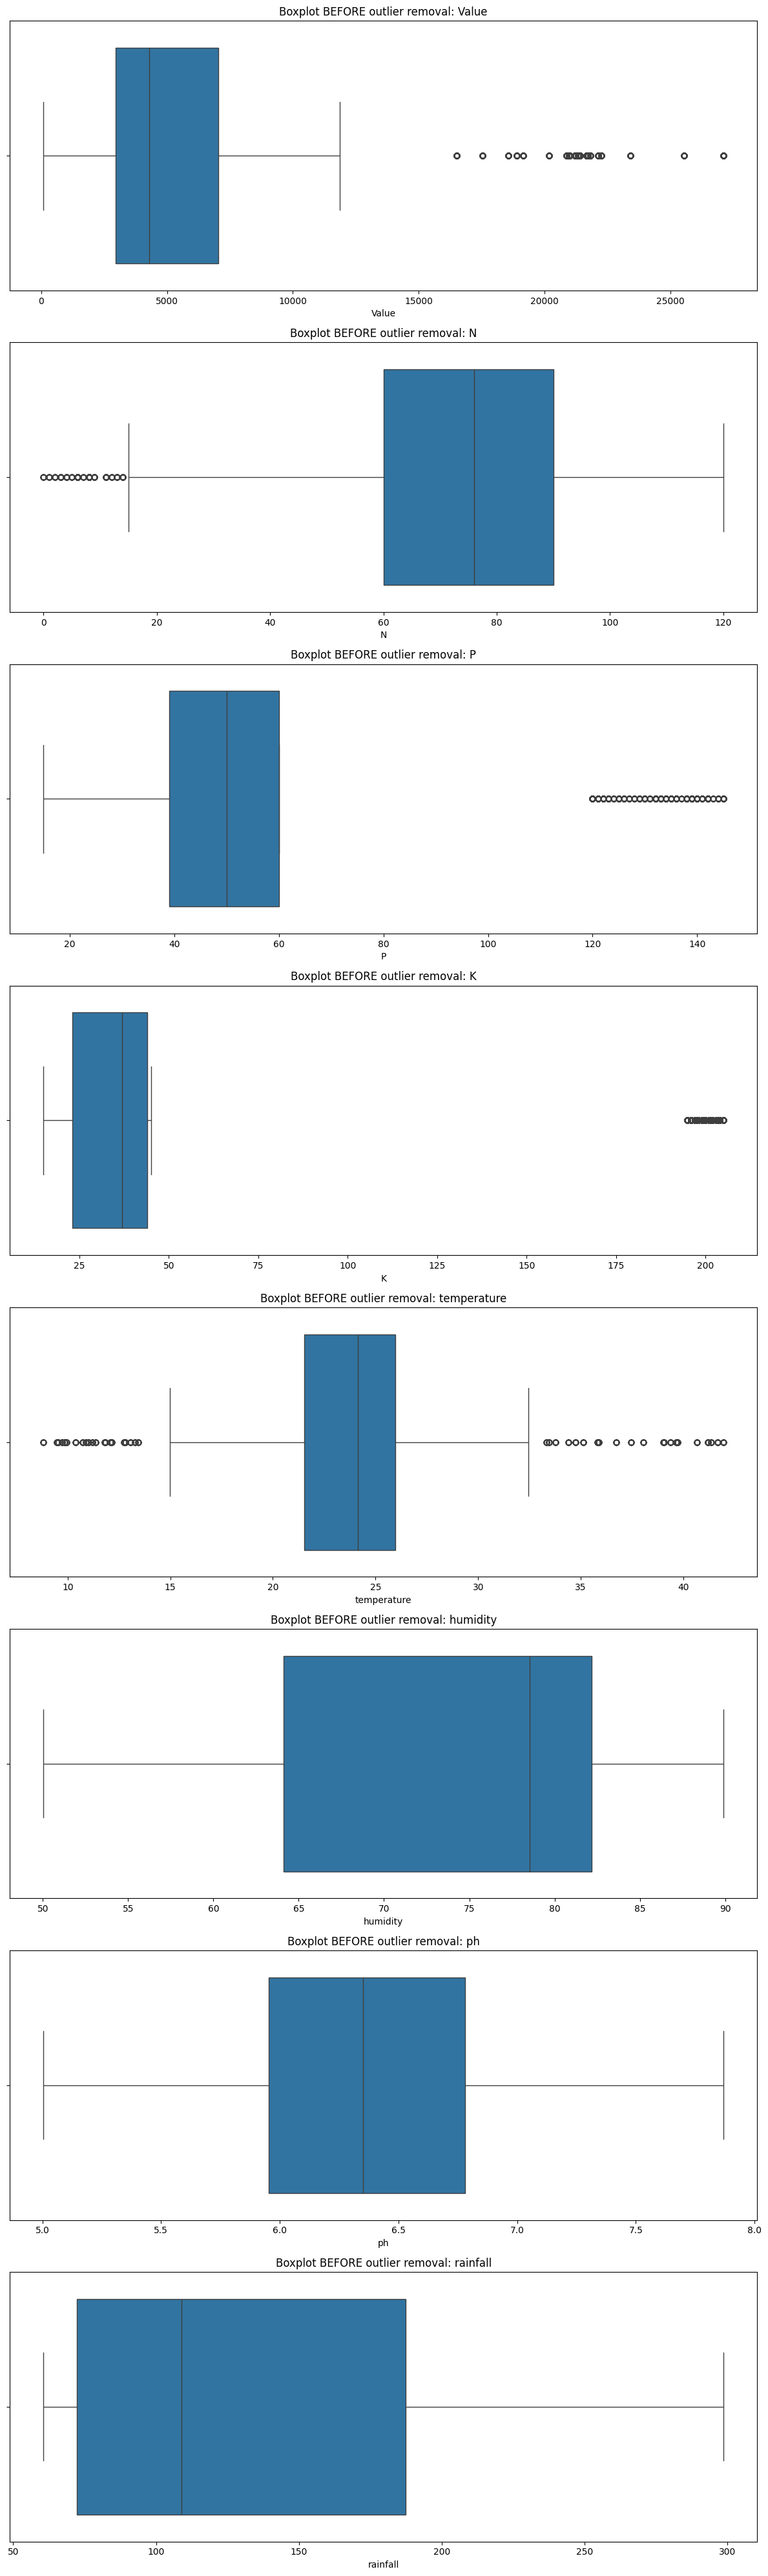

In [27]:
# Cell 11: Boxplots BEFORE outlier removal
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns we want
numeric_cols = []
for c in ['Value','N','P','K','temperature','humidity','ph','rainfall']:
    matches = [col for col in merged.columns if col.lower() == c.lower()]
    if matches:
        numeric_cols.append(matches[0])

print("Numeric columns used for boxplots:", numeric_cols)

# Plot
plt.figure(figsize=(12, 5 * len(numeric_cols)))  # size scales with number of boxplots

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=merged[col])
    plt.title(f"Boxplot BEFORE outlier removal: {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [28]:
# Cell 13: Remove outliers using IQR on the numeric_cols chosen earlier
import numpy as np

if not numeric_cols:
    print("No numeric cols for outlier removal. Skipping.")
else:
    df = merged_clean.copy()

    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Boolean mask: True if NOT an outlier across any numeric column
    mask = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
             (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

    before = df.shape[0]
    df_iqr = df[mask].copy()
    after = df_iqr.shape[0]

    print(f"Rows before outlier removal: {before}")
    print(f"Rows after outlier removal:  {after}")
    print(f"Rows removed: {before-after} ({((before-after)/before)*100:.2f}%)")

    merged_clean_iqr = df_iqr.copy()
    display(merged_clean_iqr.head())


Rows before outlier removal: 12400
Rows after outlier removal:  9700
Rows removed: 2700 (21.77%)


,Area,Year,Unit,Value,Element,Area Code (M49),Item Code (CPC),crop_clean,N,P,K,temperature,humidity,ph,rainfall,Crop
0,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
1,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
3,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
4,China,2015,kg/ha,2707.2,Yield,159,1610.0,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


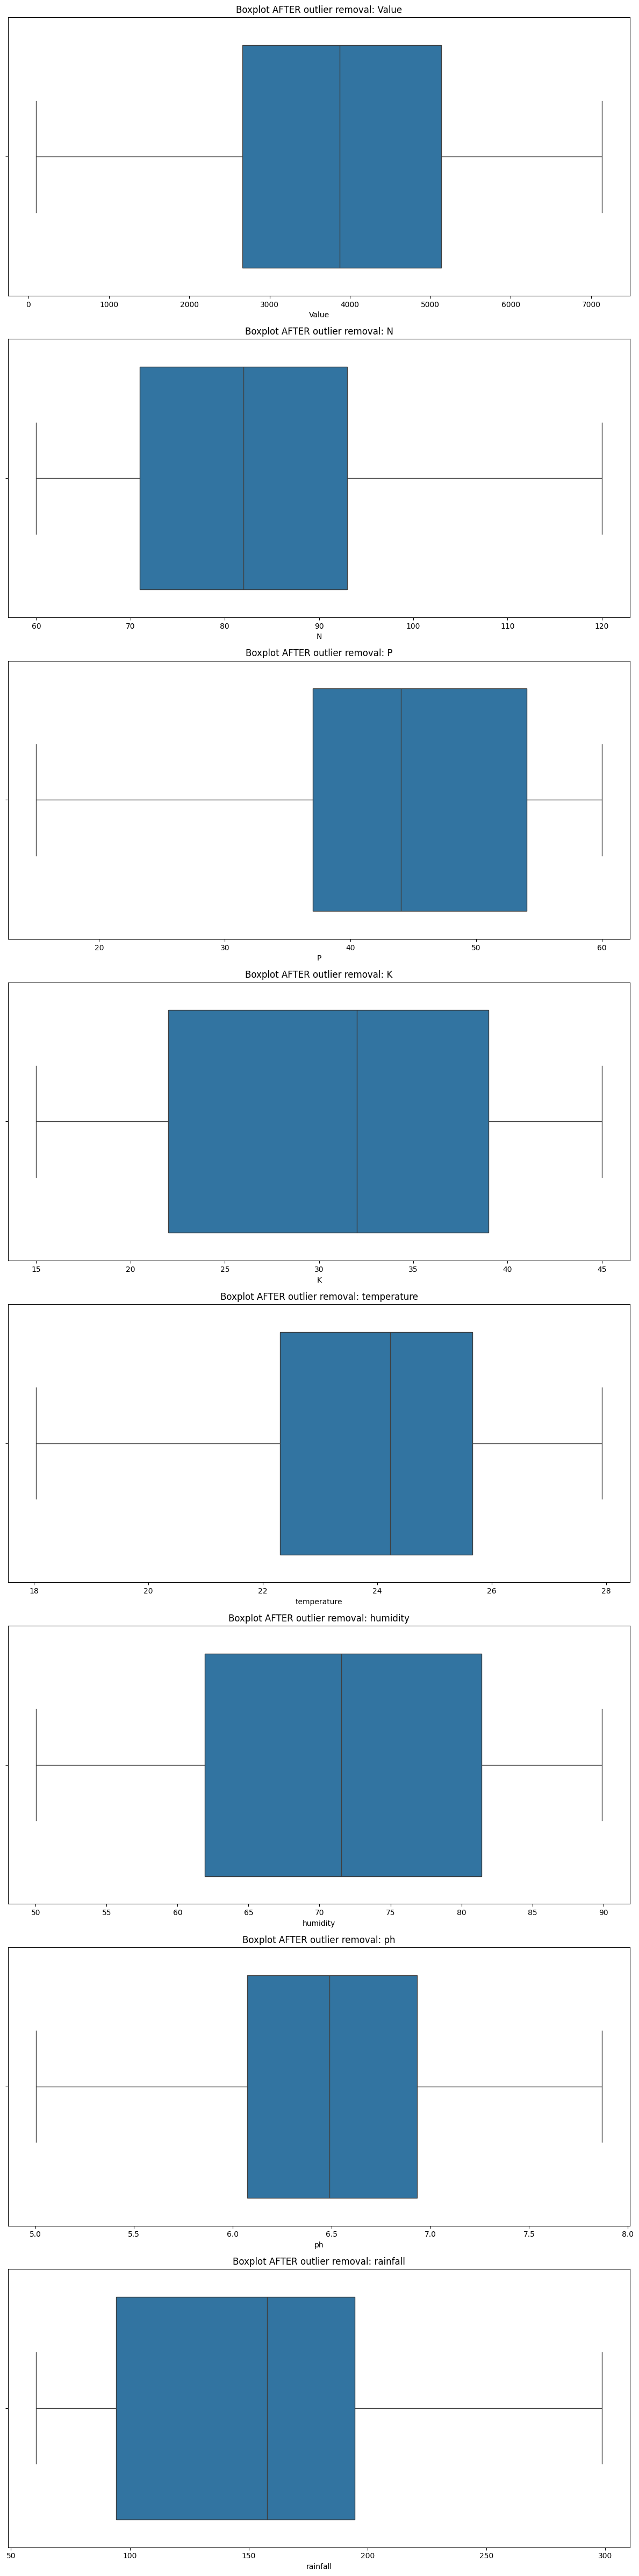

In [29]:
# Cell 14: Boxplots AFTER outlier removal
if numeric_cols and "merged_clean_iqr" in globals():
    plt.figure(figsize=(12, 6 * len(numeric_cols)))  # same style as before

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.boxplot(x=merged_clean_iqr[col])
        plt.title(f"Boxplot AFTER outlier removal: {col}")
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()
else:
    print("No cleaned dataset available for boxplots after outlier removal.")


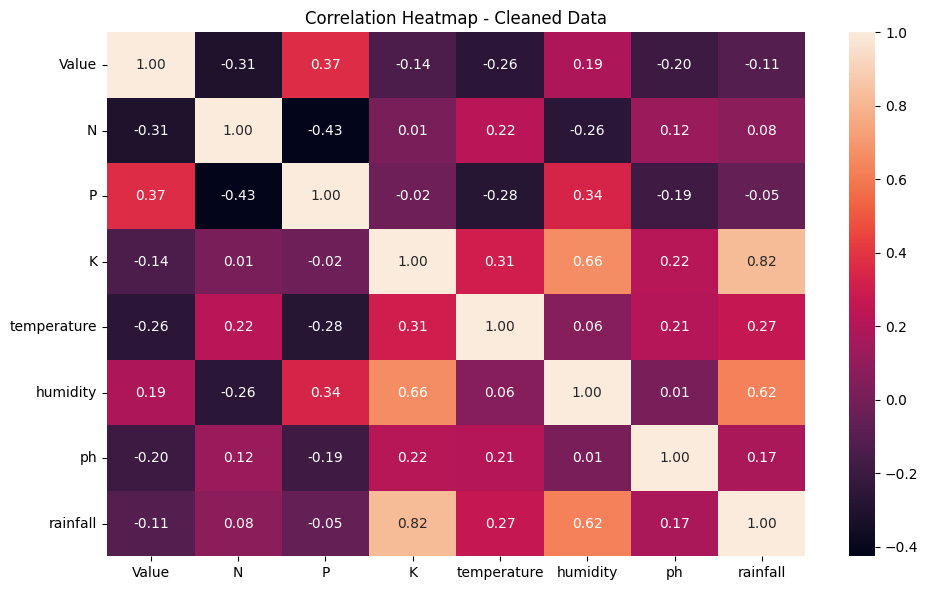

In [30]:
# Cell 15: Correlation heatmap on cleaned data
if numeric_cols and 'merged_clean_iqr' in globals() and len(numeric_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        merged_clean_iqr[numeric_cols].corr(),
        annot=True,
        fmt=".2f"
    )
    plt.title("Correlation Heatmap - Cleaned Data")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric data to plot heatmap.")


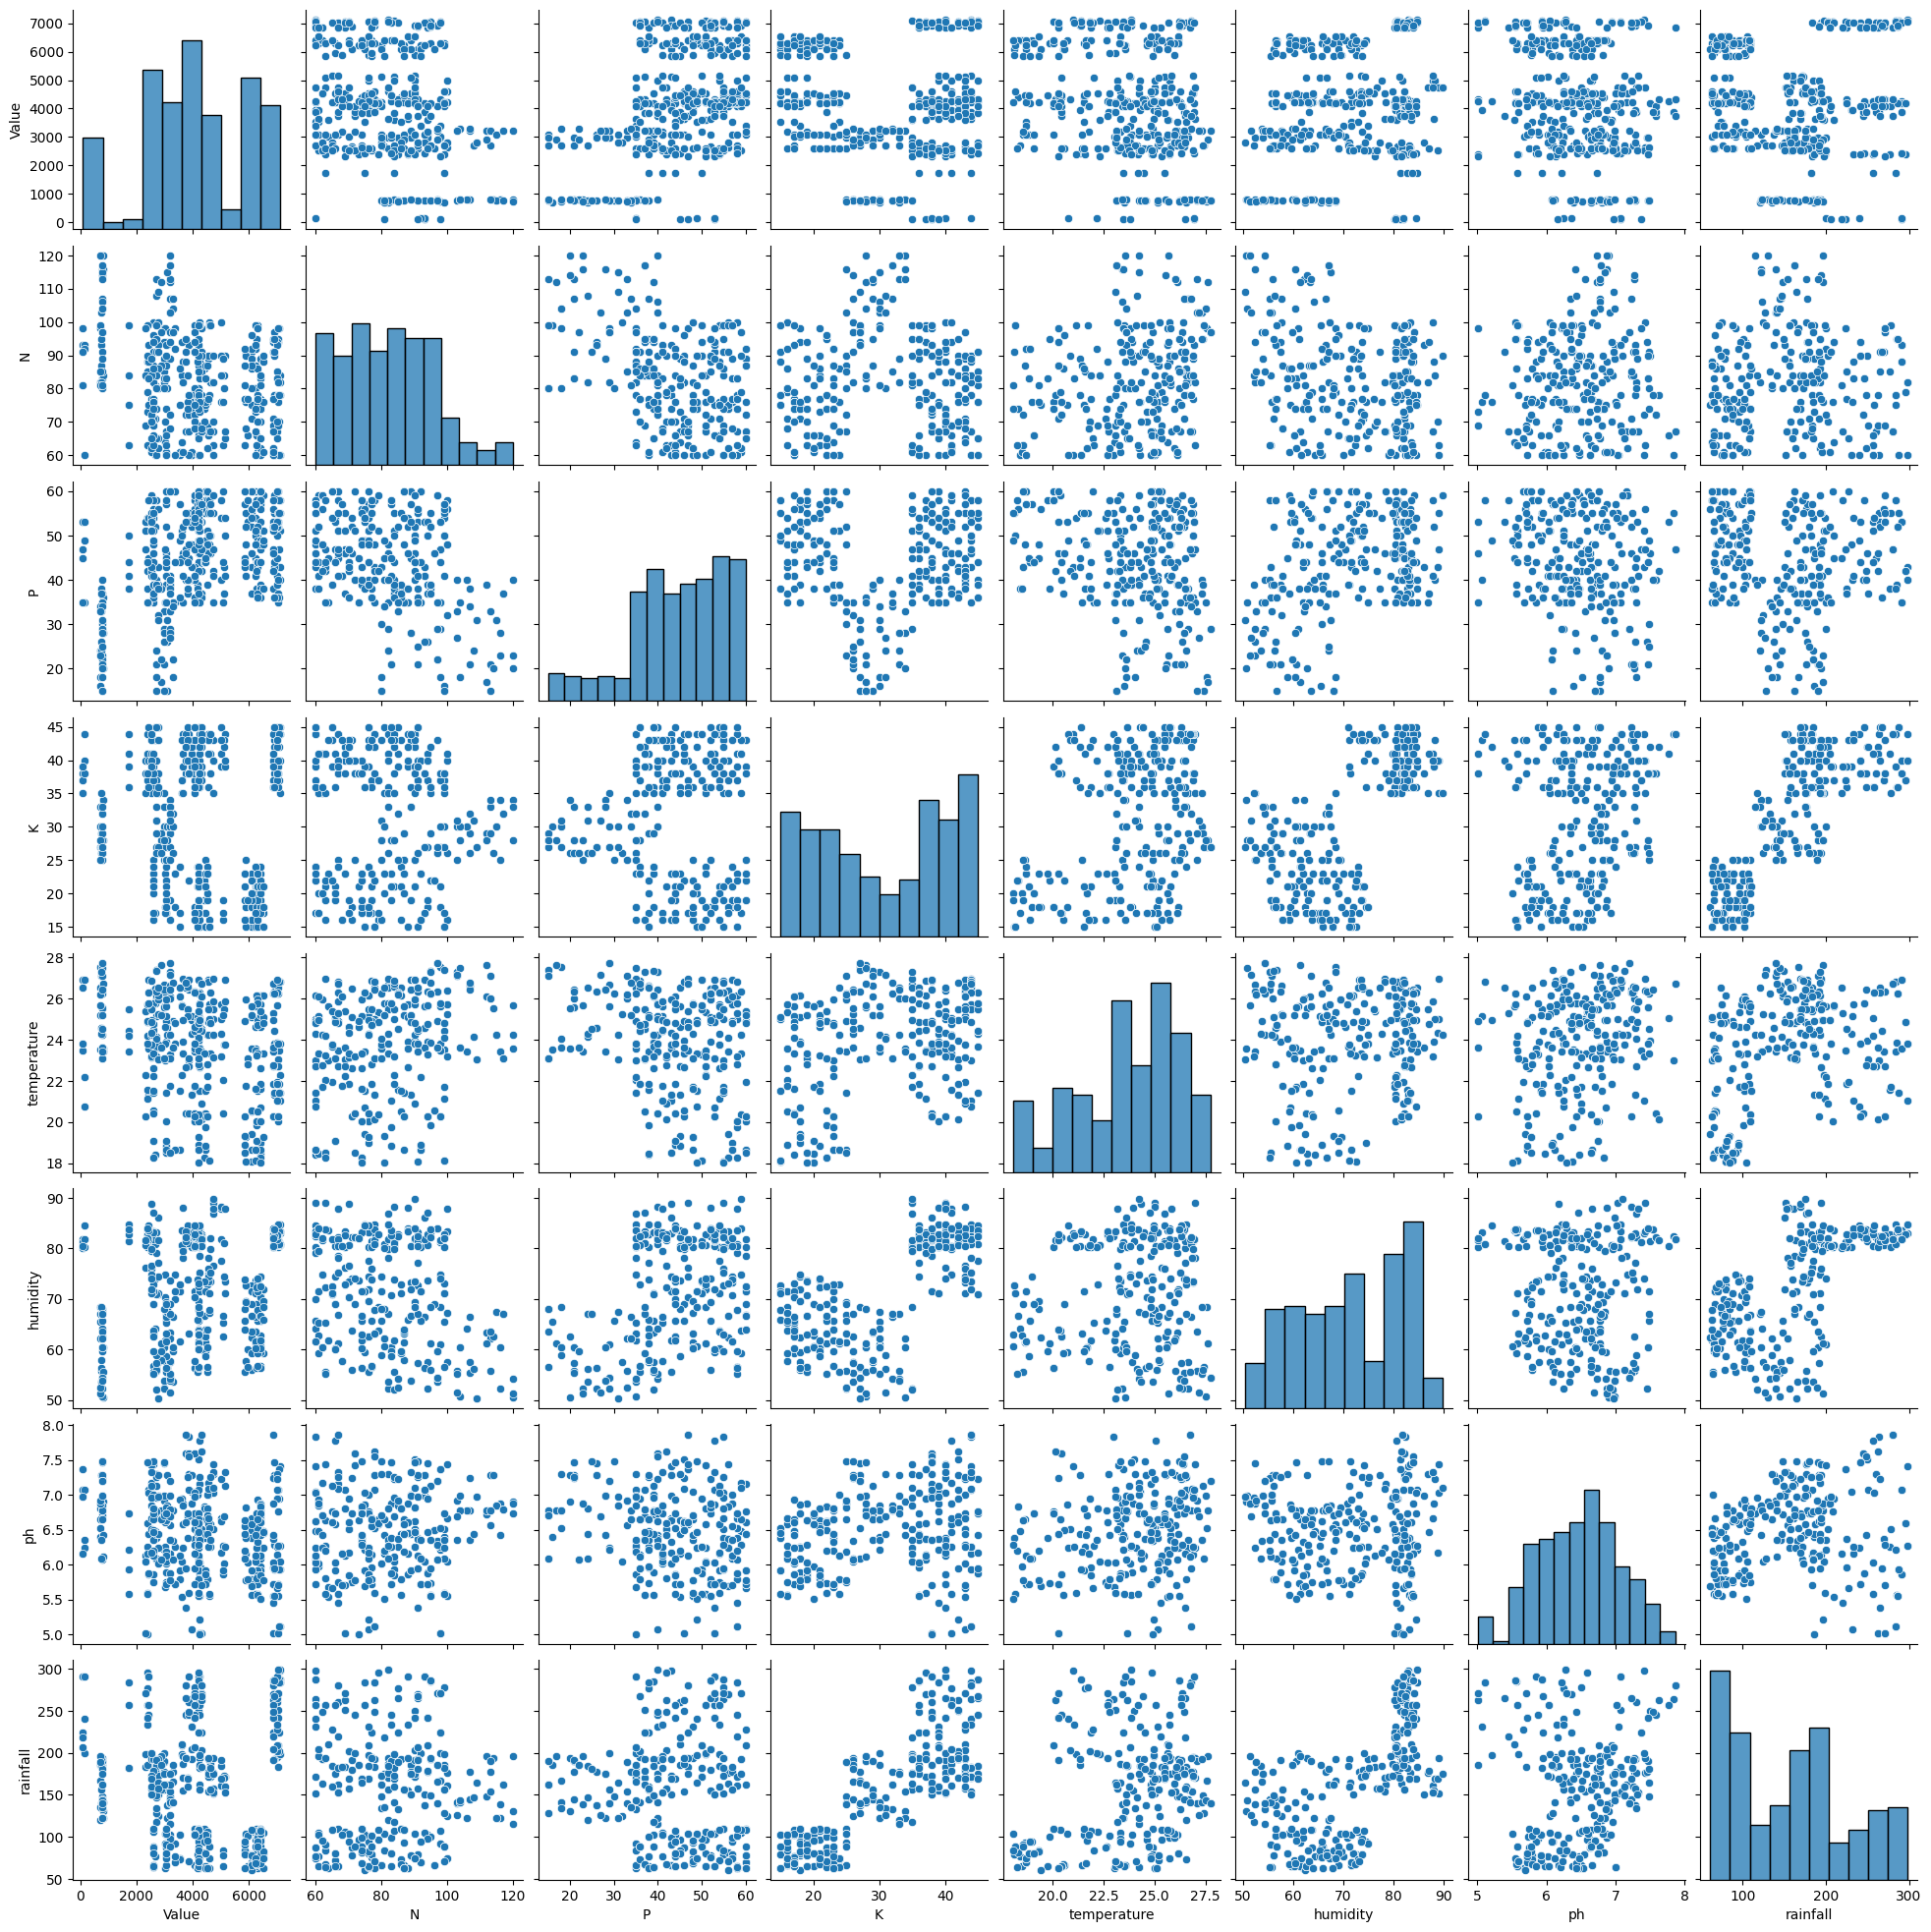

In [31]:
# Pairplot on a sample up to 400 rows
if numeric_cols and 'merged_clean_iqr' in globals() and len(numeric_cols) > 1:
    sample = merged_clean_iqr[numeric_cols].sample(
        n=min(400, merged_clean_iqr.shape[0]),
        random_state=42
    )
    sns.pairplot(sample)
    plt.show()
else:
    print("Not enough numeric data to plot heatmap/pairplot.")


In [23]:
drive_out = "/content/drive/MyDrive/merged_clean_iqr.csv"
merged_clean_iqr.to_csv(drive_out, index=False)

print("Saved final cleaned CSV to:", drive_out)


Saved final cleaned CSV to: /content/drive/MyDrive/merged_clean_iqr.csv
